In [ ]:
pip install pandas

In [1]:
import urllib.request
import json
from pandas import json_normalize
from urllib.parse import urlencode, quote_plus, unquote

In [ ]:
#서비스 요청 주소, 서비스키, 요청 내용을 입력합니다.
api = 'http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty'
key = unquote('5%2BbNworyK7gQMq%2Fn%2BMuoiJH0FP13DqNIV0ZVfdiNouI0N8ceNUdlQc7joe%2BAnaqCuOGM1w88vXSjr6ARLZnsnA%3D%3D')

In [ ]:
queryParams = '?' + urlencode({quote_plus('serviceKey') : key,
                               quote_plus('returnType') : 'json',
                               quote_plus('numOfRows') : '2203',
                               quote_plus('pageNo') : '1',
                               quote_plus('stationName') : '아름동',
                               quote_plus('dataTerm') : '3MONTH',
                               quote_plus('ver') : '1.0'
                               })
url = api+queryParams

In [ ]:
#데이터를 요청하고 변환합니다.
text = urllib.request.urlopen(url).read().decode('utf-8')
json_return = json.loads(text)
get_data = json_return.get('response')
df = json_normalize(get_data['body']['items'])

In [ ]:
df

,so2Grade,coFlag,khaiValue,so2Value,coValue,pm25Flag,pm10Flag,pm10Value,o3Grade,khaiGrade,...,no2Flag,no2Grade,o3Flag,pm25Grade,so2Flag,dataTime,coGrade,no2Value,pm10Grade,o3Value
0,1,None,66,0.003,0.7,None,None,26,2,2,...,None,1,None,1,None,2025-03-27 10:00,1,0.005,2,0.049
1,1,None,69,0.003,0.7,None,None,42,2,2,...,None,1,None,1,None,2025-03-27 09:00,1,0.006,2,0.050
2,1,None,71,0.004,0.7,None,None,46,2,2,...,None,1,None,1,None,2025-03-27 08:00,1,0.006,2,0.045
3,1,None,75,0.004,0.7,None,None,35,2,2,...,None,1,None,1,None,2025-03-27 07:00,1,0.010,2,0.038
4,1,None,80,0.004,0.7,None,None,40,2,2,...,None,1,None,1,None,2025-03-27 06:00,1,0.008,2,0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2153,1,None,55,0.004,0.4,None,None,38,2,2,...,None,1,None,1,None,2024-12-27 17:00,1,0.013,2,0.035
2154,1,None,56,0.004,0.4,None,None,35,2,2,...,None,1,None,1,None,2024-12-27 16:00,1,0.010,2,0.036
2155,1,None,56,0.004,0.4,None,None,37,2,2,...,None,1,None,1,None,2024-12-27 15:00,1,0.010,2,0.036
2156,1,None,54,0.004,0.4,None,None,43,2,2,...,None,1,None,1,None,2024-12-27 14:00,1,0.012,2,0.034


In [3]:
import requests

# 👉 발급받은 서비스 키 넣기 (decoding된 상태로)
API_KEY = "5%2BbNworyK7gQMq%2Fn%2BMuoiJH0FP13DqNIV0ZVfdiNouI0N8ceNUdlQc7joe%2BAnaqCuOGM1w88vXSjr6ARLZnsnA%3D%3D"

# 👉 측정소 이름 (아름동에 가장 가까운 측정소, 예: '세종아름')
STATION_NAME = "아름동"

# API 호출 URL
url = (
    f"http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/"
    f"getMsrstnAcctoRltmMesureDnsty?serviceKey={API_KEY}"
    f"&returnType=json&numOfRows=1&pageNo=1"
    f"&stationName={STATION_NAME}&dataTerm=DAILY&ver=1.3"
)

# API 호출
response = requests.get(url)
data = response.json()

# 데이터 파싱
try:
    item = data['response']['body']['items'][0]
    print(f"✅ [{STATION_NAME}] 측정소 ({item['dataTime']})")
    print(f"미세먼지(PM10): {item['pm10Value']} ㎍/㎥")
    print(f"초미세먼지(PM2.5): {item['pm25Value']} ㎍/㎥")
    print(f"오존농도(O3): {item['o3Value']} ppm")
    print(f"아황산가스(SO2): {item['so2Value']} ppm")
    print(f"이산화질소(NO2): {item['no2Value']} ppm")
    print(f"일산화탄소(CO): {item['coValue']} ppm")
except Exception as e:
    print("❌ 데이터를 불러오는 데 문제가 발생했습니다:", e)

✅ [아름동] 측정소 (2025-03-27 11:00)
미세먼지(PM10): 17 ㎍/㎥
초미세먼지(PM2.5): 20 ㎍/㎥
오존농도(O3): 0.047 ppm
아황산가스(SO2): 0.003 ppm
이산화질소(NO2): 0.008 ppm
일산화탄소(CO): 0.7 ppm


In [4]:
def get_pm10_grade(value):
    value = int(value)
    if value <= 30:
        return "좋음"
    elif value <= 80:
        return "보통"
    elif value <= 150:
        return "나쁨"
    else:
        return "매우 나쁨"

def get_pm25_grade(value):
    value = int(value)
    if value <= 15:
        return "좋음"
    elif value <= 35:
        return "보통"
    elif value <= 75:
        return "나쁨"
    else:
        return "매우 나쁨"


In [5]:
pm10 = item['pm10Value']
pm25 = item['pm25Value']

print(f"미세먼지(PM10): {pm10} ㎍/㎥ → {get_pm10_grade(pm10)}")
print(f"초미세먼지(PM2.5): {pm25} ㎍/㎥ → {get_pm25_grade(pm25)}")


미세먼지(PM10): 17 ㎍/㎥ → 좋음
초미세먼지(PM2.5): 20 ㎍/㎥ → 보통


In [8]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/a6/b6/a9405484fb40746fdc6ae4502b16a9d6e53282ba5baaf9ebe2da579f68c4/matplotlib-3.10.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/a1/35/c2de8823211d07e8a79ab018ef03960716c5dff6f4d5bff5af87fd682992/contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/6f/e3/5a181a85777f7809076e51f7422e0dc77eb04676c40ec8bf6a49d390d1ff/fonttools-4.56.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/104.0 kB ? eta -:--:--
     --------------- ----------------------- 41.0/104.0 kB 1.9 MB/s 


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform

# 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')  # 윈도우 기본 한글 폰트
plt.rcParams['axes.unicode_minus'] = False  # 음수 깨짐 방지

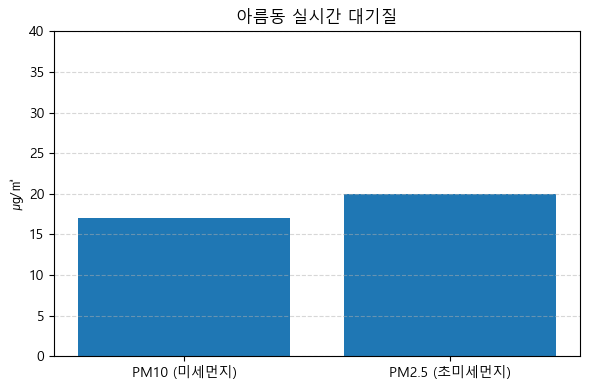

In [10]:
import matplotlib.pyplot as plt

# 값 추출
pm10 = int(item['pm10Value'])
pm25 = int(item['pm25Value'])

# 시각화
labels = ['PM10 (미세먼지)', 'PM2.5 (초미세먼지)']
values = [pm10, pm25]

plt.figure(figsize=(6, 4))
plt.bar(labels, values)
plt.title("아름동 실시간 대기질")
plt.ylabel("㎍/㎥")
plt.ylim(0, max(values) + 20)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

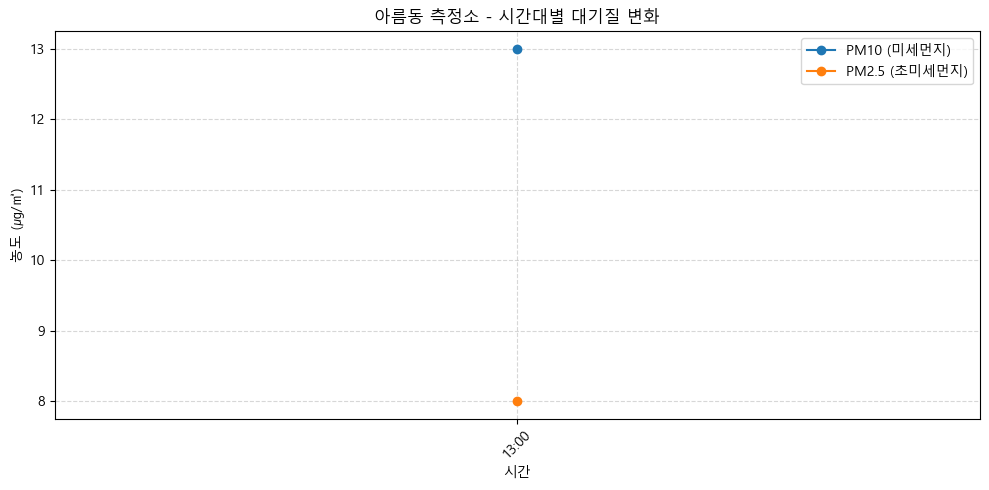

In [12]:
# 👉 발급받은 서비스 키 넣기 (decoding된 상태로)
API_KEY = "5%2BbNworyK7gQMq%2Fn%2BMuoiJH0FP13DqNIV0ZVfdiNouI0N8ceNUdlQc7joe%2BAnaqCuOGM1w88vXSjr6ARLZnsnA%3D%3D"

# 👉 측정소 이름 (아름동에 가장 가까운 측정소, 예: '세종아름')
STATION_NAME = "아름동"

# API 호출 URL
url = (
    f"http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/"
    f"getMsrstnAcctoRltmMesureDnsty?serviceKey={API_KEY}"
    f"&returnType=json&numOfRows=1&pageNo=1"
    f"&stationName={STATION_NAME}&dataTerm=DAILY&ver=1.3"
)

# API 호출
response = requests.get(url)
data = response.json()

items = data['response']['body']['items']

# 시간순 정렬 (API는 최신순으로 줌 → 역순)
items.reverse()

# 데이터 추출
times = [item['dataTime'][-5:] for item in items]  # '15:00' 형태로
pm10 = [int(item['pm10Value']) if item['pm10Value'].isdigit() else 0 for item in items]
pm25 = [int(item['pm25Value']) if item['pm25Value'].isdigit() else 0 for item in items]

# 그래프
plt.figure(figsize=(10, 5))
plt.plot(times, pm10, marker='o', label='PM10 (미세먼지)')
plt.plot(times, pm25, marker='o', label='PM2.5 (초미세먼지)')
plt.title(f"{STATION_NAME} 측정소 - 시간대별 대기질 변화")
plt.xlabel("시간")
plt.ylabel("농도 (㎍/㎥)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [13]:
import requests
import csv
import os
from datetime import datetime

# API 정보
API_KEY = "5%2BbNworyK7gQMq%2Fn%2BMuoiJH0FP13DqNIV0ZVfdiNouI0N8ceNUdlQc7joe%2BAnaqCuOGM1w88vXSjr6ARLZnsnA%3D%3D"
STATION_NAME = "아름동"

# 등급 판별 함수
def get_pm10_grade(value):
    value = int(value)
    if value <= 30:
        return "좋음"
    elif value <= 80:
        return "보통"
    elif value <= 150:
        return "나쁨"
    else:
        return "매우 나쁨"

def get_pm25_grade(value):
    value = int(value)
    if value <= 15:
        return "좋음"
    elif value <= 35:
        return "보통"
    elif value <= 75:
        return "나쁨"
    else:
        return "매우 나쁨"

# API 호출
url = (
    f"http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/"
    f"getMsrstnAcctoRltmMesureDnsty?serviceKey={API_KEY}"
    f"&returnType=json&numOfRows=1&pageNo=1"
    f"&stationName={STATION_NAME}&dataTerm=DAILY&ver=1.3"
)

response = requests.get(url)
data = response.json()
item = data['response']['body']['items'][0]

# 데이터 정리
now = datetime.now().strftime("%Y-%m-%d %H:%M")
pm10 = item['pm10Value']
pm25 = item['pm25Value']

row = {
    "시간": now,
    "PM10": pm10,
    "PM10 등급": get_pm10_grade(pm10),
    "PM2.5": pm25,
    "PM2.5 등급": get_pm25_grade(pm25)
}

# CSV 파일 저장
file_exists = os.path.isfile("data.csv")
with open("data.csv", "a", newline="", encoding="utf-8-sig") as f:
    writer = csv.DictWriter(f, fieldnames=row.keys())
    if not file_exists:
        writer.writeheader()
    writer.writerow(row)

print("✅ 데이터 저장 완료:", row)


✅ 데이터 저장 완료: {'시간': '2025-03-27 13:23', 'PM10': '13', 'PM10 등급': '좋음', 'PM2.5': '8', 'PM2.5 등급': '좋음'}


In [14]:
pip install streamlit


  Obtaining dependency information for streamlit from https://files.pythonhosted.org/packages/46/9e/e51e34f504940da00145795b9e8be9c129704708b071f672f3626a37d842/streamlit-1.44.0-py3-none-any.whl.metadata
  Obtaining dependency information for altair<6,>=4.0 from https://files.pythonhosted.org/packages/aa/f3/0b6ced594e51cc95d8c1fc1640d3623770d01e4969d29c0bd09945fafefa/altair-5.5.0-py3-none-any.whl.metadata
  Obtaining dependency information for blinker<2,>=1.0.0 from https://files.pythonhosted.org/packages/10/cb/f2ad4230dc2eb1a74edf38f1a38b9b52277f75bef262d8908e60d957e13c/blinker-1.9.0-py3-none-any.whl.metadata
  Obtaining dependency information for cachetools<6,>=4.0 from https://files.pythonhosted.org/packages/72/76/20fa66124dbe6be5cafeb312ece67de6b61dd91a0247d1ea13db4ebb33c2/cachetools-5.5.2-py3-none-any.whl.metadata
  Obtaining dependency information for click<9,>=7.0 from https://files.pythonhosted.org/packages/7e/d4/7ebdbd03970677812aac39c869717059dbb71a4cfc033ca6e5221787892c/cli


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


2025-03-27 13:31:26.550 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:31:26.708 
  command:

    streamlit run c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-03-27 13:31:26.708 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:31:26.784 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:31:26.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:31:26.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:31:26.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-27 13:31:2

DeltaGenerator()

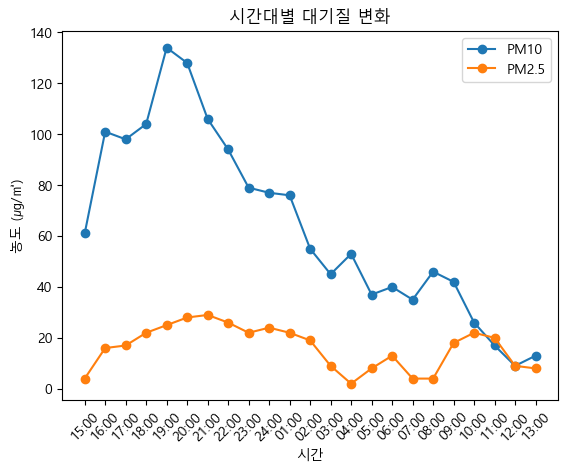

In [15]:
import streamlit as st
import requests
from datetime import datetime
import matplotlib.pyplot as plt

# 페이지 제목
st.title("🌫️ 아름동 실시간 대기질 대시보드")

# API 설정
API_KEY = "5%2BbNworyK7gQMq%2Fn%2BMuoiJH0FP13DqNIV0ZVfdiNouI0N8ceNUdlQc7joe%2BAnaqCuOGM1w88vXSjr6ARLZnsnA%3D%3D"
STATION_NAME = "아름동"

url = (
    f"http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/"
    f"getMsrstnAcctoRltmMesureDnsty?serviceKey={API_KEY}"
    f"&returnType=json&numOfRows=24&pageNo=1"
    f"&stationName={STATION_NAME}&dataTerm=DAILY&ver=1.3"
)

response = requests.get(url)
data = response.json()

items = data['response']['body']['items']
items.reverse()

# 시간대별 PM10/PM2.5 수치
times = [item['dataTime'][-5:] for item in items]
pm10 = [int(item['pm10Value']) if item['pm10Value'].isdigit() else 0 for item in items]
pm25 = [int(item['pm25Value']) if item['pm25Value'].isdigit() else 0 for item in items]

# 최근 데이터
latest = items[-1]
st.subheader(f"📍 측정소: {STATION_NAME} ({latest['dataTime']})")
st.metric("미세먼지 (PM10)", f"{latest['pm10Value']} ㎍/㎥")
st.metric("초미세먼지 (PM2.5)", f"{latest['pm25Value']} ㎍/㎥")

# 시각화
fig, ax = plt.subplots()
ax.plot(times, pm10, label="PM10", marker='o')
ax.plot(times, pm25, label="PM2.5", marker='o')
plt.xticks(rotation=45)
ax.set_title("시간대별 대기질 변화")
ax.set_xlabel("시간")
ax.set_ylabel("농도 (㎍/㎥)")
ax.legend()
st.pyplot(fig)


In [18]:
streamlit run app.py

SyntaxError: invalid syntax (3737097518.py, line 1)